# Modelos Lineales, Optimización

Se implementará un clasificador lineal y se entrenará usando gradiente descendente estocástico, con modificaciones y numpy.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Clasificación bidimensional

Para hacer las cosas más intuitivas, vamos a resolver un preblema de clasificación 2D con datos sintéticos.

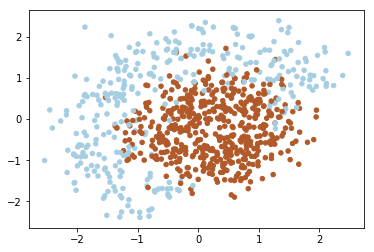

In [2]:
with open('train.npy', 'rb') as fin:
    X = np.load(fin)
    
with open('target.npy', 'rb') as fin:
    y = np.load(fin)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=20)
plt.show();

# Tarea

## Características

Es evidente que los datos que se muestran arriba no son linealmente separables. Por ello, debemos añadir características, o usar modelos no lineales. Hay que notar que la línea de decisión entre las dos clases tiene forma circular, por lo que se pueden añadir características cuadráticas para convertir el problema en linealmente separable. La idea subyacente a esto se muestra debajo:

![](kernel.png)

In [26]:
def expandir(X):
    """
    Añade características cuadráticas. 
    Esta expansión permite al modelo lineal realizar separaciones no lineales.
    
    Para cada muestra (fila de una matriz), computa una fila expandida:
    [característica0, característica1, fcaracterística0^2,
     característica1^2, característica0*característica1, 1]
    
    :parámetro X: matriz de características, dimensiones [n_muestras,2]
    :retorna: características expandidas de dimensiones [n_muestras,6]
    """
    
    X_expandida = np.zeros((X.shape[0], 6))
    
    X_expandida[:, 5] = 1
    X_expandida[:, 4] = X[:, 0] * X[:, 1]
    X_expandida[:, 3] = X[:, 1] ** 2
    X_expandida[:, 2] = X[:, 0] ** 2
    X_expandida[:, 1] = X[:, 1]
    X_expandida[:, 0] = X[:, 0]
    
    return X_expandida

In [27]:
X_expandida = expandir(X)

Aquí se hacen algunos testeos de la implementación de la función `expandir`.

In [28]:
# test simple en números aleatorios

dummy_X = np.array([
        [0,0],
        [1,0],
        [2.61,-1.28],
        [-0.59,2.1]
    ])

# llama a la función expandir
dummy_expandida = expandir(dummy_X)

# lo que debería devolver      :   x0       x1       x0^2     x1^2     x0*x1    1
dummy_expandida_res = np.array([[ 0.   ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ],
                               [ 1.    ,  0.    ,  1.    ,  0.    ,  0.    ,  1.    ],
                               [ 2.61  , -1.28  ,  6.8121,  1.6384, -3.3408,  1.    ],
                               [-0.59  ,  2.1   ,  0.3481,  4.41  , -1.239 ,  1.    ]])

# testeo
assert isinstance(dummy_expandida, np.ndarray), 'por favor, asegúrate de retornar una array de numpy'
assert dummy_expandida.shape==dummy_expanded_ans.shape,'por favor, asegúrate de que la dimensión es correcta'
assert np.allclose(dummy_expandida, dummy_expandida_res,1e-3), 'Algo es erróneo en las características'

print('¡Correcto!')


¡Correcto!


## Logistic regression

To classify objects we will obtain probability of object belongs to class '1'. To predict probability we will use output of linear model and logistic function:

$$ a(x; w) = \langle w, x \rangle $$
$$ P( y=1 \; \big| \; x, \, w) = \dfrac{1}{1 + \exp(- \langle w, x \rangle)} = \sigma(\langle w, x \rangle)$$


In [6]:
def probability(X, w):
    """
    Given input features and weights
    return predicted probabilities of y==1 given x, P(y=1|x), see description above
        
    Don't forget to use expand(X) function (where necessary) in this and subsequent functions.
    
    :param X: feature matrix X of shape [n_samples,6] (expanded)
    :param w: weight vector w of shape [6] for each of the expanded features
    :returns: an array of predicted probabilities in [0,1] interval.
    """

    # TODO:<your code here>
    
    return 1 / (1 + np.exp(-np.dot(X, w)))

In [7]:
dummy_weights = np.linspace(-1, 1, 6)
ans_part1 = probability(X_expanded[:1, :], dummy_weights)[0]
print(ans_part1)

0.3803998509843769


In logistic regression the optimal parameters $w$ are found by cross-entropy minimization:

$$ L(w) =  - {1 \over \ell} \sum_{i=1}^\ell \left[ {y_i \cdot log P(y_i = 1 \, | \, x_i,w) + (1-y_i) \cdot log (1-P(y_i = 1\, | \, x_i,w))}\right] $$



In [8]:
def compute_loss(X, y, w):
    """
    Given feature matrix X [n_samples,6], target vector [n_samples] of 1/0,
    and weight vector w [6], compute scalar loss function using formula above.
    """
    # TODO:<your code here>
    
    proba = probability(X, w)
    a = (1 - y) * np.log(1 - probability(X, w))
    b = y * np.log(probability(X, w))
    return  - np.mean(a + b)

In [9]:
# use output of this cell to fill answer field 
ans_part2 = compute_loss(X_expanded, y, dummy_weights)
print(ans_part2)

1.0185634030782518


Since we train our model with gradient descent, we should compute gradients.

To be specific, we need a derivative of loss function over each weight [6 of them].

$$ \nabla_w L = ...$$

We won't be giving you the exact formula this time — instead, try figuring out a derivative with pen and paper. 

As usual, we've made a small test for you, but if you need more, feel free to check your math against finite differences (estimate how $L$ changes if you shift $w$ by $10^{-5}$ or so).

https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression
https://www.coursera.org/learn/intro-to-deep-learning/discussions/weeks/1/threads/e1DNftBVEeeeDgqph8eWrA

In [10]:
def compute_grad(X, y, w):
    """
    Given feature matrix X [n_samples,6], target vector [n_samples] of 1/0,
    and weight vector w [6], compute vector [6] of derivatives of L over each weights.
    """
    
    # TODO<your code here>
        
    return np.dot(X.T, probability(X, w) - y) / X.shape[0]

In [11]:
# use output of this cell to fill answer field 
ans_part3 = np.linalg.norm(compute_grad(X_expanded, y, dummy_weights))

Here's an auxiliary function that visualizes the predictions:

In [12]:
from IPython import display

h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

def visualize(X, y, w, history):
    """draws classifier prediction with matplotlib magic"""
    Z = probability(expand(np.c_[xx.ravel(), yy.ravel()]), w)
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.subplot(1, 2, 2)
    plt.plot(history)
    plt.grid()
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    display.clear_output(wait=True)
    plt.show()

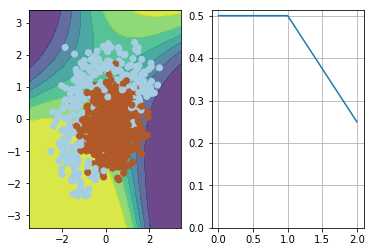

In [13]:
visualize(X, y, dummy_weights, [0.5, 0.5, 0.25])

## Training
In this section we'll use the functions you wrote to train our classifier using stochastic gradient descent.

You can try change hyperparameters like batch size, learning rate and so on to find the best one, but use our hyperparameters when fill answers.

## Mini-batch SGD

Stochastic gradient descent just takes a random example on each iteration, calculates a gradient of the loss on it and makes a step:
$$ w_t = w_{t-1} - \eta \dfrac{1}{m} \sum_{j=1}^m \nabla_w L(w_t, x_{i_j}, y_{i_j}) $$



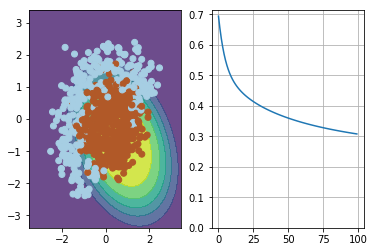

<Figure size 432x288 with 0 Axes>

In [14]:
# please use np.random.seed(42), eta=0.1, n_iter=100 and batch_size=4 for deterministic results

np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])

eta = 0.1 # learning rate

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12, 5))

for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss)

    # TODO:<your code here>

    w =  w - eta * compute_grad(X_expanded, y, w)

visualize(X, y, w, loss)
plt.clf();

In [15]:
# use output of this cell to fill answer field 

ans_part4 = compute_loss(X_expanded, y, w)

## SGD with momentum

Momentum is a method that helps accelerate SGD in the relevant direction and dampens oscillations as can be seen in image below. It does this by adding a fraction $\alpha$ of the update vector of the past time step to the current update vector.
<br>
<br>

$$ \nu_t = \alpha \nu_{t-1} + \eta\dfrac{1}{m} \sum_{j=1}^m \nabla_w L(w_t, x_{i_j}, y_{i_j}) $$
$$ w_t = w_{t-1} - \nu_t$$

<br>


![](sgd.png)


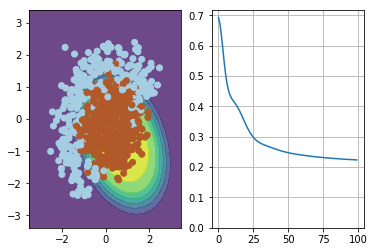

<Figure size 432x288 with 0 Axes>

In [16]:
# please use np.random.seed(42), eta=0.05, alpha=0.9, n_iter=100 and batch_size=4 for deterministic results
np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])

eta = 0.05 # learning rate
alpha = 0.9 # momentum
nu = np.zeros_like(w)

update = 0

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12, 5))

for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss)

    # TODO:<your code here>
    
    update =  update * alpha + eta * compute_grad(X_expanded, y, w)
    
    w =  w - update

visualize(X, y, w, loss)
plt.clf()

In [17]:
# use output of this cell to fill answer field 

ans_part5 = compute_loss(X_expanded, y, w)

## RMSprop

Implement RMSPROP algorithm, which use squared gradients to adjust learning rate:

$$ G_j^t = \alpha G_j^{t-1} + (1 - \alpha) g_{tj}^2 $$
$$ w_j^t = w_j^{t-1} - \dfrac{\eta}{\sqrt{G_j^t + \varepsilon}} g_{tj} $$

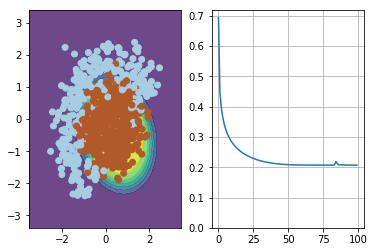

<Figure size 432x288 with 0 Axes>

In [18]:
# please use np.random.seed(42), eta=0.1, alpha=0.9, n_iter=100 and batch_size=4 for deterministic results
np.random.seed(42)

w = np.array([0, 0, 0, 0, 0, 1.])

eta = 0.1 # learning rate
alpha = 0.9 # moving average of gradient norm squared
g2 = None
eps = 1e-8

G = 0

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss)

    # TODO:<your code here>
    
    G = alpha * G + (1 - alpha) * compute_grad(X_expanded, y, w) ** 2
    
    w = w - eta / np.sqrt(G + eps) * compute_grad(X_expanded, y, w)

visualize(X, y, w, loss)
plt.clf()

In [19]:
# use output of this cell to fill answer field 
ans_part6 = compute_loss(X_expanded, y, w)